In [10]:
from cospar import reader, F, paramkeys, datakeys

import math

from everest.window import Canvas
from everest.window.data import Data
%matplotlib inline

from everest.h5anchor import Reader, Fetch

In [19]:
paramCut = reader[(Fetch('*/f') > 0)]
freq1Cut = paramCut & reader[Fetch('*/temperatureField') == '_built_peaskauslu-thoesfthuec']
freq2Cut = paramCut & reader[Fetch('*/temperatureField') == '_built_oiskeaosle-woatihoo']
isoCut = paramCut << (freq1Cut | freq2Cut)

In [20]:
isoCut

Scope(
('scioswngiush-angoubliah', '...')
('grooscdoukl-saghtwudr', '...')
('fleetwdroe-freupsuezao', '...')
('uedweiklear-thoablsnufr', '...')
('tseiqdraox-tzaekeuteo', '...')
('auswuecheosc-thuayaayue', '...')
('oskfuar-eukaodietr', '...')
('druunuku-aalaoghuef', '...')
('ghuanianoe-izhoeghuul', '...')
('qearhaow-eileiimue', '...')
('sfuaglgrisp-uuphoiunge', '...')
('uayiofreasc-iiweauuria', '...')
('aatreusnuasf-iespoauphoi', '...')
('ozhioxeopl-aaceafaask', '...')
('uosheasuusk-yoetstheax', '...')
('dwaitzthiot-zhoiklaadrae', '...')
('ziedkaegr-sweuzheupsoi', '...')
('iogrusteir-glotromo', '...')
('uawuungoegh-oadwiugrousf', '...')
('deaklswuek-gaomsluast', '...')
('tzuawrshuups-stoerhzhuz', '...')
('wrodsnikr-botwyuez', '...')
)

In [21]:
datas = sorted(reader[isoCut : ('tauRef', 'f', 'aspect', 't', 'Nu')].values())

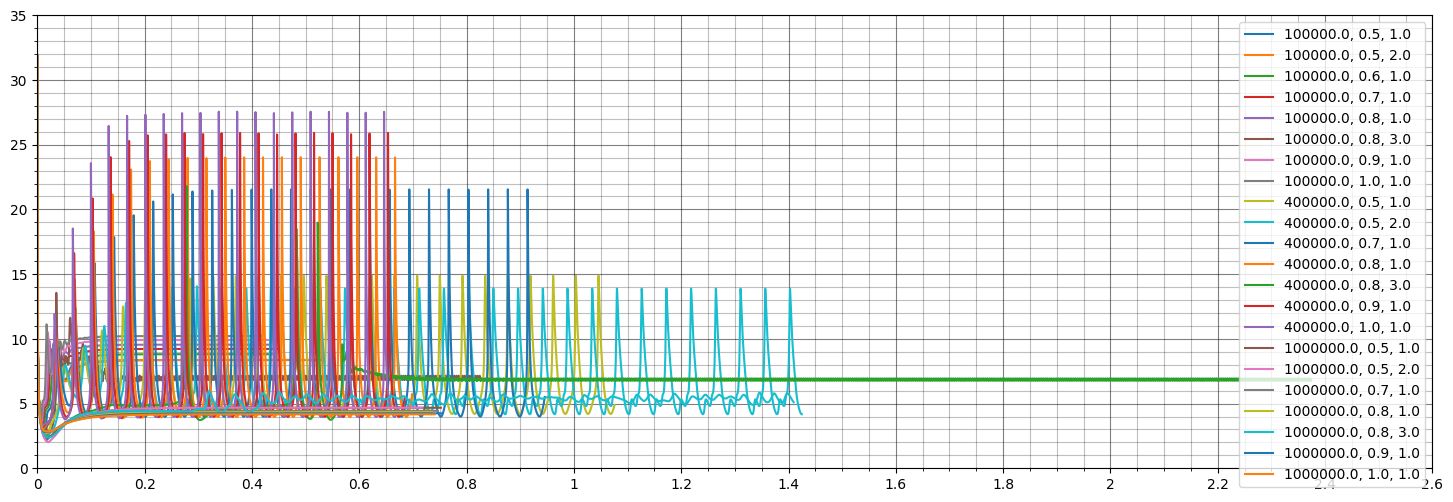

In [24]:
tauRef, f, aspect, t, Nu = datas[-1]
canvas = Canvas(size = (18, 6))
ax = canvas.make_ax()
labels = []
for *params, t, Nu in datas:
    labels.append(', '.join(str(v) for v in params))
    ax.line(t, Nu)
ax.ax.legend(labels)
canvas.show()

In [47]:
import math

from everest.window import Canvas
from everest.window.data import Data
%matplotlib inline

In [68]:
canvas = Canvas(
    size = (12, 6),
    facecolour = 'white',
    )
ax = canvas.make_ax()
tauRefs = []
for tauRef, t, Nu in datas:
    tauRefs.append(math.log10(tauRef))
    ax.line(
        Data(t, label =  'Dimensionless time'),
        Data(Nu, label = 'Nusselt number'),
        )
    ax.axes.title = 'MS98 reproduction: isoviscous initial conditions'
    ax.axes.colour = 'black'
    ax.ticks.x.colour = 'black'
    ax.ticks.y.colour = 'black'
    ax.grid.colour = 'grey'

ax = canvas.axs[0][0][0]
legendHandles = [r[0] for r in ax.collections]
legendLabels = [str(round(v, 1)) for v in tauRefs]
handles, labels = zip(*sorted(zip(legendHandles, legendLabels), key = lambda r: r[-1]))
legend = ax.ax.legend(
    handles,
    labels,
    loc = 'right',
    framealpha = 1.,
    labelcolor = 'black',
    facecolor = 'white',
    frameon = True,
    title = 'Yield stress \n(10^n)',
    bbox_to_anchor = (0.988, 0.85),
    )
legend.properties()['title'].set_color('black')
legend.get_frame().set_edgecolor('black')

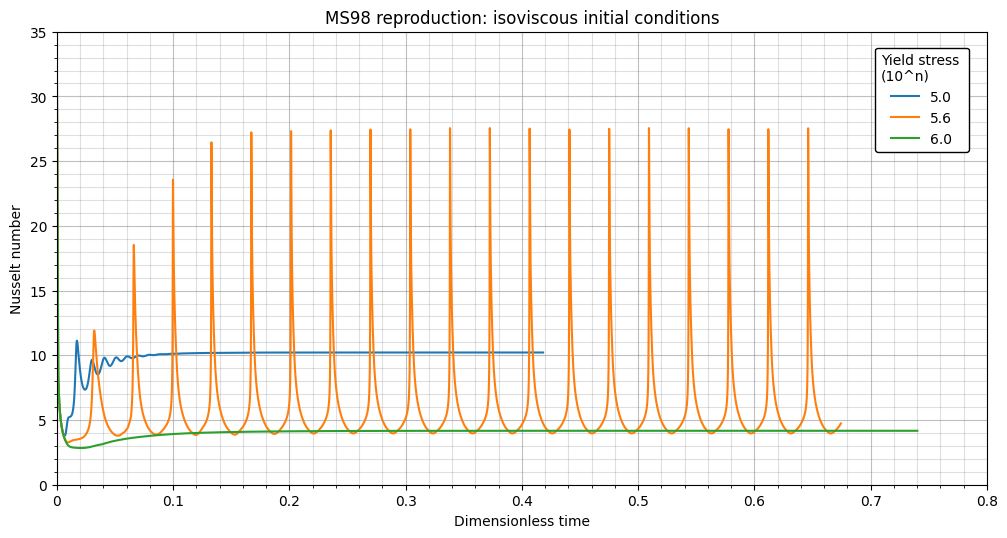

In [69]:
canvas.show()